In [1]:
import numpy as np

dataset = np.loadtxt("datasets/2016.csv", delimiter=",", encoding="utf-8", dtype=np.str_)
label = dataset[0]
data = np.array(dataset[1:])

print(*label, sep=", ")

Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual


In [2]:
COL_REGION = 1
COL_SCORE = 3

regions = np.unique(data[:, COL_REGION])
regions.sort()

In [3]:
region_scores = list()

for region in regions:
    rows = np.where(data[:, COL_REGION] == region)
    scores = data[rows, COL_SCORE].astype(np.float64)
    region_scores.append(scores)

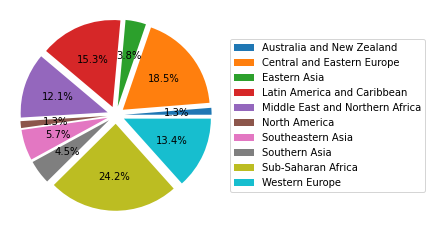

In [4]:
import matplotlib.pyplot as plt

sizes = list()
for score in region_scores:
    size = np.shape(score)[1]
    sizes.append(size)

explode = np.full(len(sizes), 0.1)
plt.pie(sizes, explode=explode, autopct="%1.1f%%")
plt.legend(regions, loc=6, bbox_to_anchor=(1, 0.5))
plt.show()

In [5]:
region_means = list(map(np.mean, region_scores))
region_variances = list(map(np.var, region_scores))

print("mean\t  variance\t  region")
print("-" * 50)
for region, mean, var in zip(regions, region_means, region_variances):
    print(f"{mean:.3f}\t| {var:.3f}\t\t| {region}")

mean	  variance	  region
--------------------------------------------------
7.323	| 0.000		| Australia and New Zealand
5.371	| 0.337		| Central and Eastern Europe
5.624	| 0.231		| Eastern Asia
6.102	| 0.505		| Latin America and Caribbean
5.386	| 1.060		| Middle East and Northern Africa
7.254	| 0.022		| North America
5.339	| 0.770		| Southeastern Asia
4.563	| 0.325		| Southern Asia
4.136	| 0.304		| Sub-Saharan Africa
6.686	| 0.593		| Western Europe


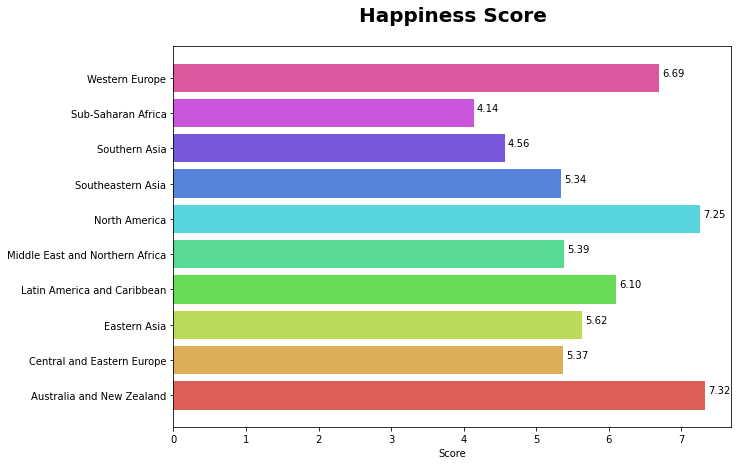

In [6]:
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

colors = sns.color_palette("hls", len(regions))
title_font = {
    "fontsize": 20,
    "fontweight": "bold"
}

colored_bars = ax.barh(regions, region_means, color=colors)
ax.set_xlabel("Score")
ax.set_title("Happiness Score", fontdict=title_font, pad=25)

for bar, mean in zip(colored_bars, region_means):
    x = bar.get_width() + 0.2
    y = bar.get_y() + bar.get_height() / 2
    ax.text(x, y, f"{mean:.2f}", ha="center", va="bottom")
    
plt.show()

--- 

In [7]:
result = list(zip(regions, region_scores))
result = np.array(result, dtype=np.object_)
np.save("datasets/score_by_region_2016", result)

In [8]:
saved = np.load("datasets/score_by_region_2016.npy", allow_pickle=True)
saved

array([['Australia and New Zealand', array([[7.334, 7.313]])],
       ['Central and Eastern Europe',
        array([[6.596, 6.078, 5.987, 5.919, 5.897, 5.856, 5.835, 5.813, 5.802,
                5.768, 5.658, 5.56 , 5.528, 5.517, 5.488, 5.401, 5.291, 5.185,
                5.177, 5.163, 5.161, 5.145, 5.121, 4.996, 4.655, 4.36 , 4.324,
                4.252, 4.217]])                                               ],
       ['Eastern Asia',
        array([[6.379, 5.921, 5.835, 5.458, 5.245, 4.907]])],
       ['Latin America and Caribbean',
        array([[7.087, 7.039, 6.952, 6.778, 6.705, 6.701, 6.65 , 6.545, 6.481,
                6.324, 6.269, 6.168, 6.084, 6.068, 5.992, 5.976, 5.956, 5.822,
                5.743, 5.538, 5.51 , 5.155, 4.871, 4.028]])                   ],
       ['Middle East and Northern Africa',
        array([[7.267, 6.573, 6.379, 6.375, 6.355, 6.239, 6.218, 5.615, 5.389,
                5.303, 5.151, 5.129, 5.045, 4.813, 4.754, 4.575, 4.362, 3.724,
                